**Thinkful - 3.4.4 - Challenge - Support Vector Machines**
* Transform this regression problem into a binary classifier
* Cut your feature set down to the 30 most valuable features
* Take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

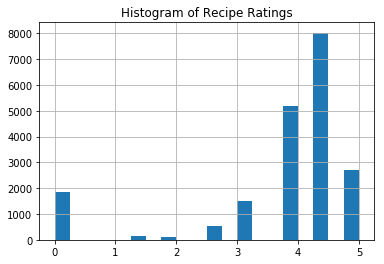

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
%matplotlib inline

raw_data = pd.read_csv('Data/epi_r.csv')

raw_data.rating.describe()

raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

In [2]:
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

svr.score(X, Y)
cross_val_score(svr, X, Y, cv=5)

array([ 0.01818511,  0.026411  ,  0.03037705,  0.01957949,  0.02451197])

**Create Binary Classifier**

In [3]:
rec_score = []
for j in range(len(raw_data['rating'])):
    if raw_data['rating'][j]>3.5:
        rec_score.append(1)
    else:
        rec_score.append(0)
raw_data['rating'] = pd.Series(rec_score, index=raw_data.index)

**Reduce Feature Set to 30 Most Valuable Features**

In [10]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA 

X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
sklearn_pca = PCA(n_components=30)
X_pca = sklearn_pca.fit_transform(X)

svc = SVC()
svc_pca = svc.fit(X_pca,Y)

print("R^2 = ",svc.score(X_pca, Y))
score_pca = cross_val_score(svc_pca, X_pca, Y, cv=10)
print("Cross Validation, CV = 10:")
print(score_pca)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score_pca.mean(), score_pca.std() * 2))

R^2 =  0.801216836226
Cross Validation, CV = 10:
[ 0.79910269  0.79810568  0.80109671  0.8000997   0.8000997   0.80548628
  0.80349127  0.79790419  0.79640719  0.80638723]
Unweighted Accuracy: 0.80 (+/- 0.01)


**Evaluating Bias**

Take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

Potential sources of bias is the nationality of the people voting, as people from different countries may have different palettes and preferences, and therefore recipes with certain ingredients may get higher ratings not because those recipes are objectively better, but because the users have a preference for certain ingredients that are common to the cuisine that they're familiar with.